In [51]:
import pandas as pd
import numpy as np

Predicting if a person will buy life insurance based on his age using logistic regression


In [52]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [54]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [55]:
df.sample(3)

,age,bought_insurance
12,27,0
17,58,1
25,54,1


In [56]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Insurance Bought(0,1)')

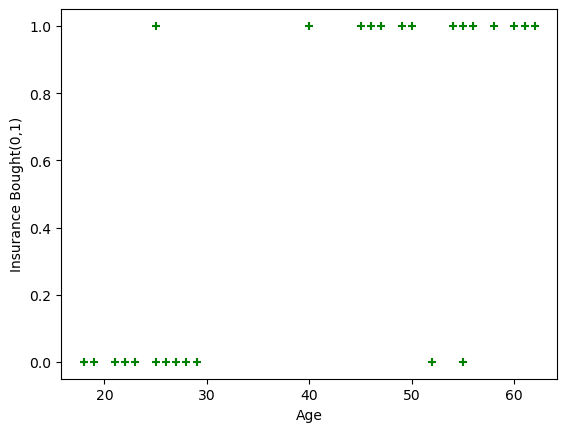

In [57]:
plt.scatter(df.age, df.bought_insurance, marker = "+", color = "green")
plt.xlabel('Age')
plt.ylabel("Insurance Bought(0,1)")

We can see some outliers in ages 2-30 and in ages 50-60. Their trends are not matching with the other values in that age region.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.8)


In [60]:
X_train

,age
13,29
9,61
7,60
19,18
23,45
21,26
6,55
2,47
17,58
16,25


In [61]:
X_test

,age
3,52
5,56
12,27
4,46
18,19
1,25


In [62]:
y_train

13    0
9     1
7     1
19    0
23    1
21    0
6     0
2     1
17    1
16    1
8     1
26    0
20    0
24    1
0     0
14    1
15    1
25    1
22    1
10    0
11    0
Name: bought_insurance, dtype: int64

In [63]:
y_test

3     0
5     1
12    0
4     1
18    0
1     0
Name: bought_insurance, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train) #train

LogisticRegression()

In [67]:
X_test

,age
3,52
5,56
12,27
4,46
18,19
1,25


In [68]:
y_predicted = model.predict(X_test) #make predictions
y_predicted

array([1, 1, 0, 1, 0, 0], dtype=int64)

In [69]:
model.predict_proba(X_test)#probability


array([[0.09300648, 0.90699352],
       [0.05451863, 0.94548137],
       [0.78927623, 0.21072377],
       [0.19561369, 0.80438631],
       [0.9221511 , 0.0778489 ],
       [0.83319066, 0.16680934]])

In [70]:
model.score(X_test, y_test)

0.8333333333333334

model.coef_ indicates value of m in y = m*x + b equation
model.intercept_ indicates value of b in that equation

In [71]:
model.coef_

array([[0.14392138]])

In [83]:
model.intercept_

array([-5.20644546])

Define sigmoid function now and do the math with hand

In [74]:
import math

In [75]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [80]:
def prediction_function(age):
    z = 0.042*age - 1.53 
    y = sigmoid(z)
    return y

In [81]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is less than 0.5 which means person with age 35 will not buy insurance

In [82]:
age = 43
prediction_function(age)


0.568565299077705

0.568 is more than 0.5 which means person with age 43 will buy insurance